In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import MultiColumnLabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import pickle

In [2]:
data =  pd.read_csv('../Dataset/garments_worker_productivity.csv')

In [3]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


### Corelation Analysis

In [4]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# corrMatrix = data.corr()
# fig, ax = plt.subplots(figsize=(15,15)) # Sample figsize in inches
# sns.heatmap(corrMatrix, annot=True, linewidths =0.5, ax=ax)
# plt.show()

In [5]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


## Data Preprocessing
### Checkin for Null Value

In [6]:
print("Data Shape is:",data.shape)
data.info()

Data Shape is: (1197, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 no

In [7]:
data.drop(['wip'], axis=1, inplace=True)

#### Handeling Data Column

In [8]:
data['date'] = pd.to_datetime(data['date'])

In [9]:
data.date

0      2015-01-01
1      2015-01-01
2      2015-01-01
3      2015-01-01
4      2015-01-01
          ...    
1192   2015-03-11
1193   2015-03-11
1194   2015-03-11
1195   2015-03-11
1196   2015-03-11
Name: date, Length: 1197, dtype: datetime64[ns]

In [10]:
data['month'] = data['date'].dt.month
data.drop(['date'], axis=1, inplace=True)

In [11]:
data['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

In [12]:
data['department'] = data['department'].apply(lambda x: 'finishing' if x.replace(" ","") == 'finishing' else 'sweing' )

In [13]:
data['department'].value_counts()

department
sweing       691
finishing    506
Name: count, dtype: int64

## Count the total Columns with there categories values

In [14]:
data['month'].value_counts()

month
1    542
2    443
3    212
Name: count, dtype: int64

In [15]:
data.describe()

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091,1.724311
std,3.463963,0.097891,10.943219,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488,0.744558
min,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705,1.000000
25%,3.000000,0.700000,3.940000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307,1.000000
50%,6.000000,0.750000,15.260000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333,2.000000
75%,9.000000,0.800000,24.260000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253,2.000000
max,12.000000,0.800000,54.560000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437,3.000000


#### Handleing Categorical Data

In [16]:
import MultiColumnLabelEncoder
Mcle = MultiColumnLabelEncoder.MultiColumnLabelEncoder()
data = Mcle.fit_transform(data)

In [17]:
data.sample(5)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
920,3,1,4,2,0.70,3.90,960,0,0.0,0,0,8.0,0.325000,2
1194,1,1,5,7,0.65,3.90,960,0,0.0,0,0,8.0,0.625625,3
856,2,1,0,4,0.75,5.13,1920,0,0.0,0,0,8.0,0.684028,2
847,2,0,0,4,0.80,30.10,7020,63,0.0,0,1,58.5,0.800094,2
243,1,1,5,9,0.80,3.94,1440,0,0.0,0,0,8.0,0.858144,1


### ? Again cehcking the corr

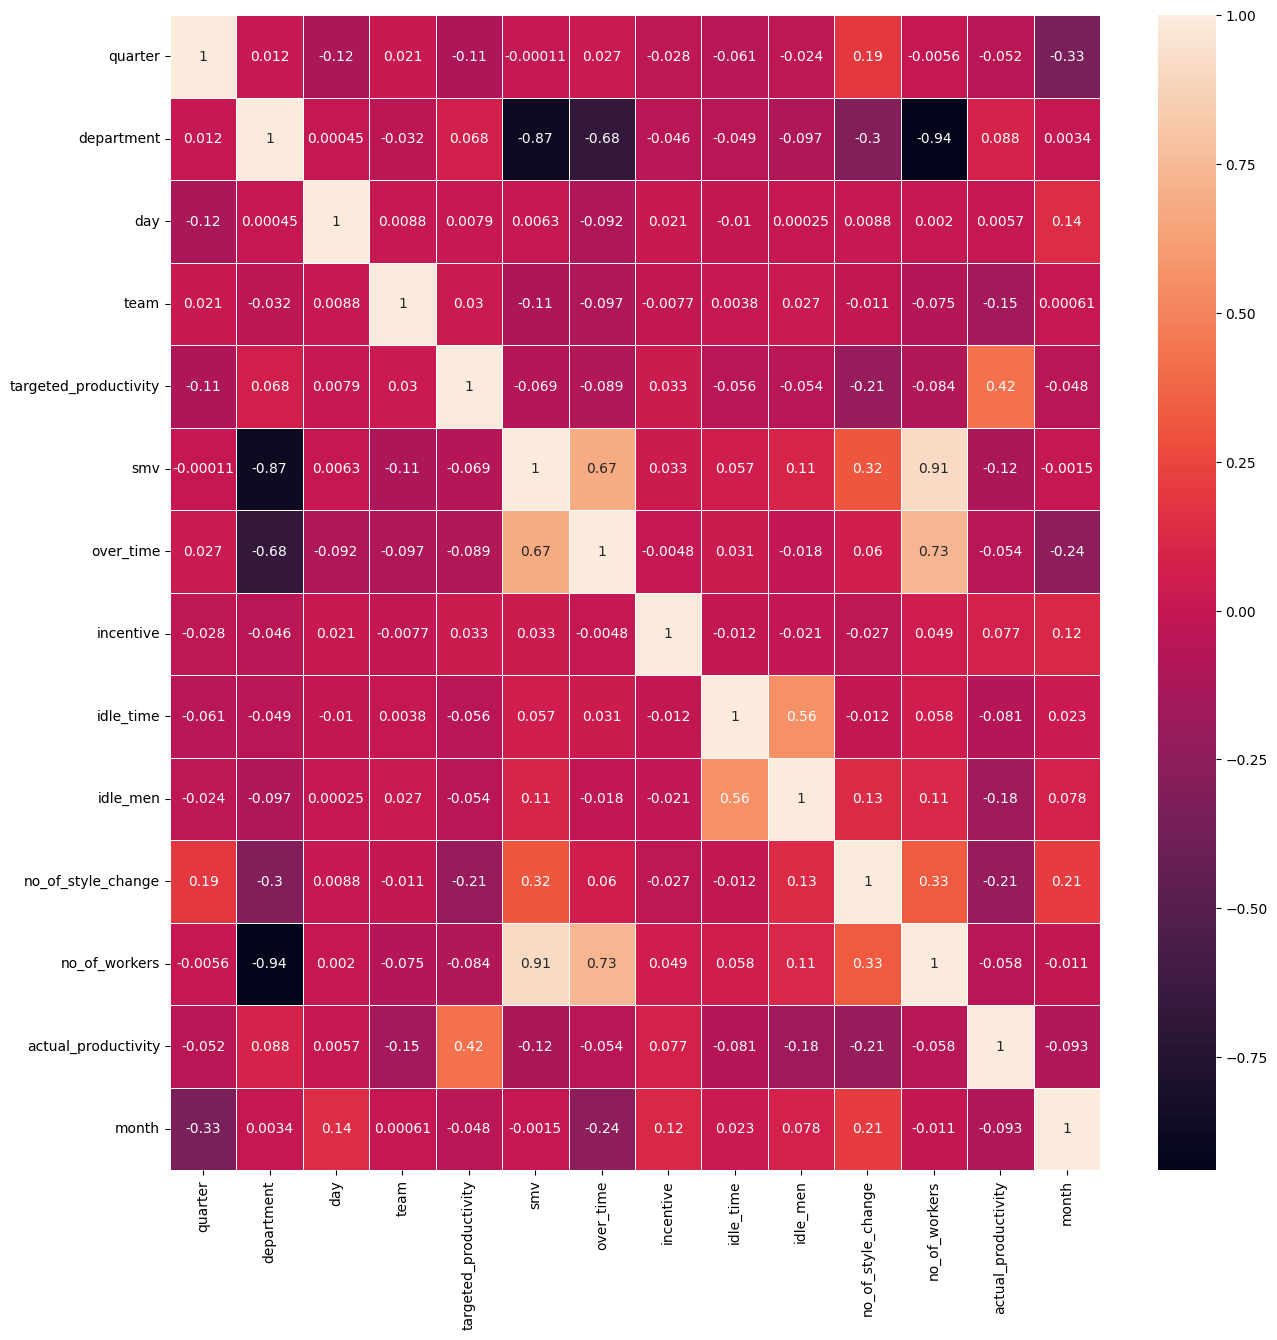

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

corrMatrix = data.corr()
fig, ax = plt.subplots(figsize=(15,15)) # Sample figsize in inches
sns.heatmap(corrMatrix, annot=True, linewidths =0.5, ax=ax)
plt.show()

In [19]:
data.corr()['actual_productivity']

quarter                 -0.051970
department               0.087624
day                      0.005747
team                    -0.148753
targeted_productivity    0.421594
smv                     -0.122089
over_time               -0.054206
incentive                0.076538
idle_time               -0.080851
idle_men                -0.181734
no_of_style_change      -0.207366
no_of_workers           -0.057991
actual_productivity      1.000000
month                   -0.092914
Name: actual_productivity, dtype: float64

If You want to descard some features , select the top column wich correlation is high

#### Spliting Data into train and test

In [20]:
x=data.drop(['actual_productivity'],axis=1)
y=data['actual_productivity']

In [21]:
X=x.to_numpy()

In [22]:
# Splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.8,random_state=0)

### Model Building

##### 1. Linear Regression model
Linear Regression has been initialized with the name model_lr. Then predictions are taken from x_test given to a variable named pred_test. After that Mean absolute error, mean squared error & r2_scrores are obtained.

In [23]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()

In [24]:
model_lr.fit(x_train,y_train)

LinearRegression()

In [25]:
pred_test = model_lr.predict(x_test)
print("test_MSE:",mean_squared_error(y_test, pred_test))
print("test_MAE:",mean_absolute_error(y_test, pred_test))
print("R2_score:{}".format(r2_score(y_test, pred_test)))

test_MSE: 0.020973077246870846
test_MAE: 0.10639164268443882
R2_score:0.29063171660927345


#### 2. Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=200,max_depth=5)

In [27]:
model_rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=200)

In [28]:
pred = model_rf.predict(x_test)
print("test_MSE:",mean_squared_error(y_test, pred))
print("test_MAE:",mean_absolute_error(y_test, pred))
print("R2_score: {}". format(r2_score(y_test, pred)))

test_MSE: 0.015503456419689683
test_MAE: 0.08566575631214969
R2_score: 0.4756296304254043


#### 3. Xgboost Model

In [29]:
model_xgb = xgb.XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1)
model_xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [30]:
pred3= model_xgb.predict(x_test)

print("test_MSE:",mean_squared_error(y_test, pred3))
print("test_MAE:",mean_absolute_error(y_test, pred3))
print("R2_score:{}".format(r2_score(y_test, pred3)))

test_MSE: 0.014514854754028826
test_MAE: 0.07633856539629594
R2_score:0.509066910909921


### Comparing the Model

After calling the function, the results of models are displayed as output. From the three model xgboost is performing well. 

From sklearn, metrics r2_score is used to evaluate the score of the model. On the parameters, we have given y_test & pred3. Our model is performing well. So, we are saving the model by pickle.dump().

### Saving the best model

In [31]:
pickle.dump(model_xgb, open('model.pkl','wb'))
pickle.dump(Mcle, open('mcle.pkl','wb'))

### Testing the model

In [32]:
model_xgb = pickle.load(open('model.pkl', 'rb'))
Mcle = pickle.load(open('mcle.pkl', 'rb'))

data = pd.read_csv('../Dataset/garments_worker_productivity.csv')
data.drop(['wip'], axis=1, inplace=True)
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data.drop(['date'], axis=1, inplace=True)
data.drop(['actual_productivity'], axis=1, inplace=True)
data['department'] = data['department'].apply(lambda x: 'finishing' if x.replace(" ","") == 'finishing' else 'sweing' )

data[0:1]



,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,month
0,Quarter1,sweing,Thursday,8,0.8,26.16,7080,98,0.0,0,0,59.0,1


In [36]:

new_data = data.iloc[[0]] 
new_data_encoded = Mcle.fit_transform(new_data)
new_data = new_data_encoded.to_numpy()

# Predict using the XGBoost model
predicted_productivity = model_xgb.predict(new_data_encoded)

# Print the predicted productivity
print("Predicted Productivity:", predicted_productivity)


Predicted Productivity: [0.9405209]


In [38]:

# Example data
example_data = {
    'quarter': ['Quarter1'],
    'department': ['sweing'],
    'day': ['Thursday'],
    'team': [8],
    'targeted_productivity': [0.80],
    'smv': [26.16],
    'over_time': [7080],
    'incentive': [98],
    'idle_time': [0.0],
    'idle_men': [0],
    'no_of_style_change': [0],
    'no_of_workers': [59.0],
    'month': [1]
}

# Convert to DataFrame
example_df = pd.DataFrame(example_data)

# Encode the data
example_encoded = Mcle.transform(example_df)
example_array = example_encoded.to_numpy()

# Predict using the XGBoost model
predicted_productivity_example = model_xgb.predict(example_array)

# Print the predicted productivity
print("Predicted Productivity for example data:", predicted_productivity_example)

AttributeError: 'MultiColumnLabelEncoder' object has no attribute 'transform'